In [2]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
from data.generated.generated_data import get_noisy_nonlinear_with_non_noisy_labels
import common_grid_search_analysis
import SVMs.common_SVM as common_SVM
import TrainingCurves
from sklearn.model_selection import ShuffleSplit

from sklearn import svm

In [3]:
GS_FILE_NAME_PREFIX = "Analysis_Data/NOISY_NONLINEAR_SVM"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "SVM"
DATASET = "Noisy Non-Linear"
GLOBAL_FIG_COUNTER = 0

default_title = "{} Default Learning Curve\n Data Set: {}".format(ALGO, DATASET)
final_title = "{} Final Tuning Learning Curve\n Data Set: {}".format(ALGO, DATASET)

In [4]:
# Load Data
X_train, X_test, y_train, y_test, y_test_non_noisy = get_noisy_nonlinear_with_non_noisy_labels()
num_features = X_train.shape[1]

In [4]:
# Start with Learning Curve on Default Classifier
default_train_sizes, default_train_scores, default_test_scores, default_fit_times, default_score_times\
= TrainingCurves.perform_learning_curve(svm.SVC(), X_train, y_train, "accuracy")

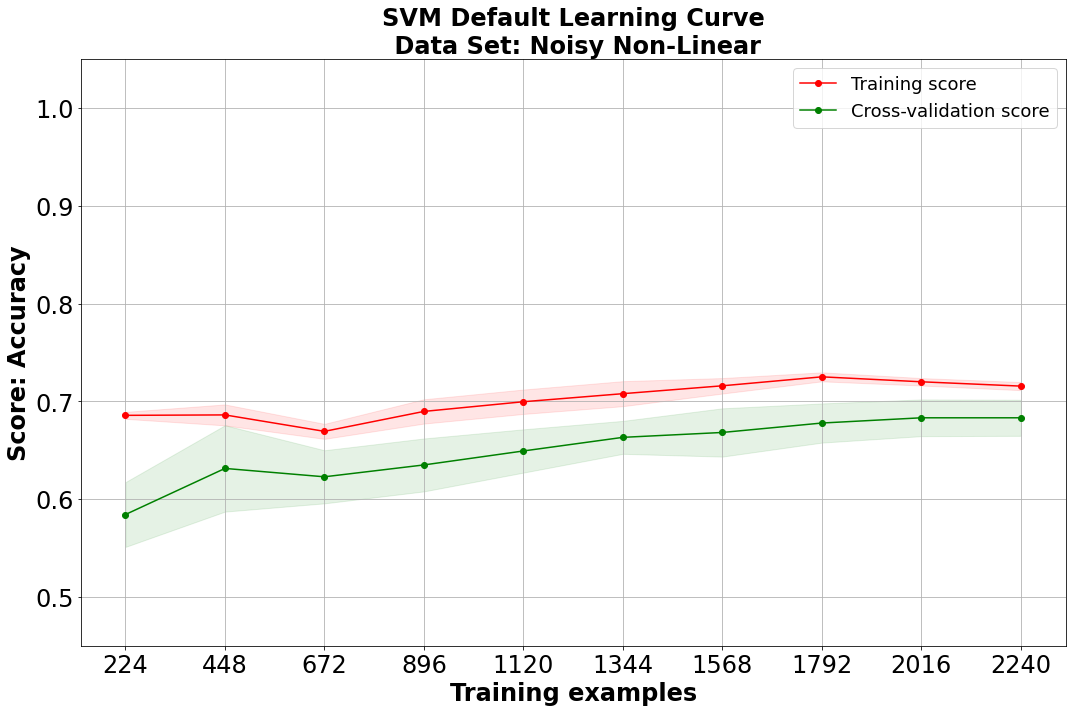

In [5]:

ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(default_train_scores, default_test_scores, default_train_sizes, default_title, ylim=ylim)

In [6]:
C = [i for i in range(1, 100, 2)]
gamma = [i for i in range(1, 150, 2)]
kernel = ["linear", "rbf", "poly"]
degree = [2, 3, 4, 5, 6]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.2s finished


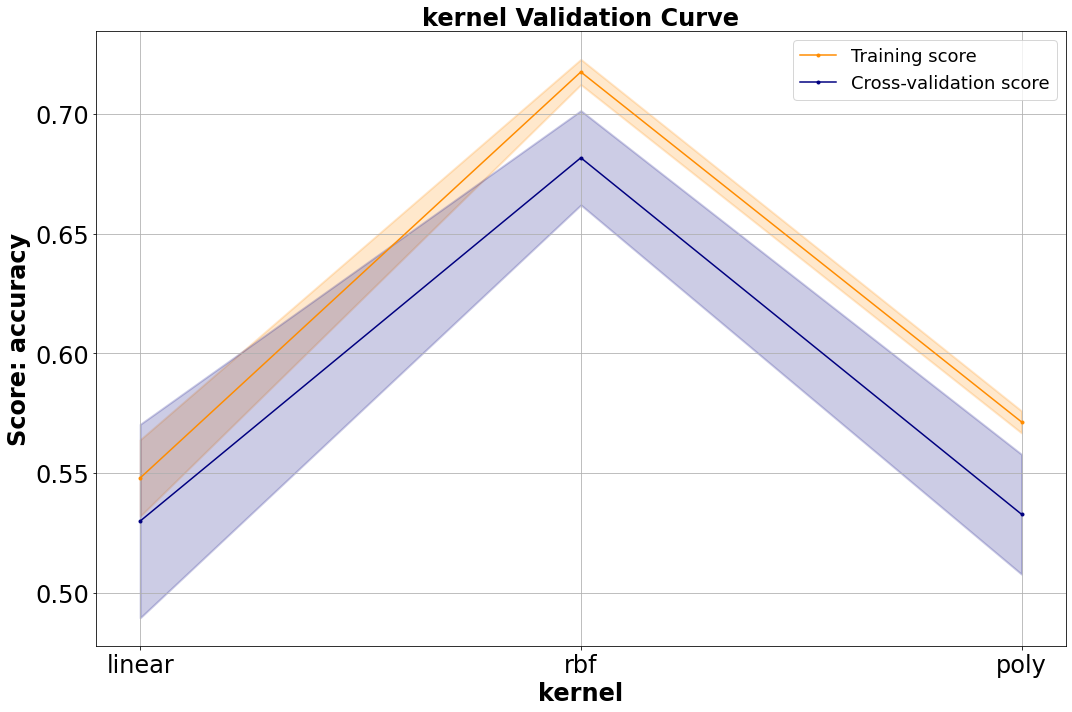

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.9s finished


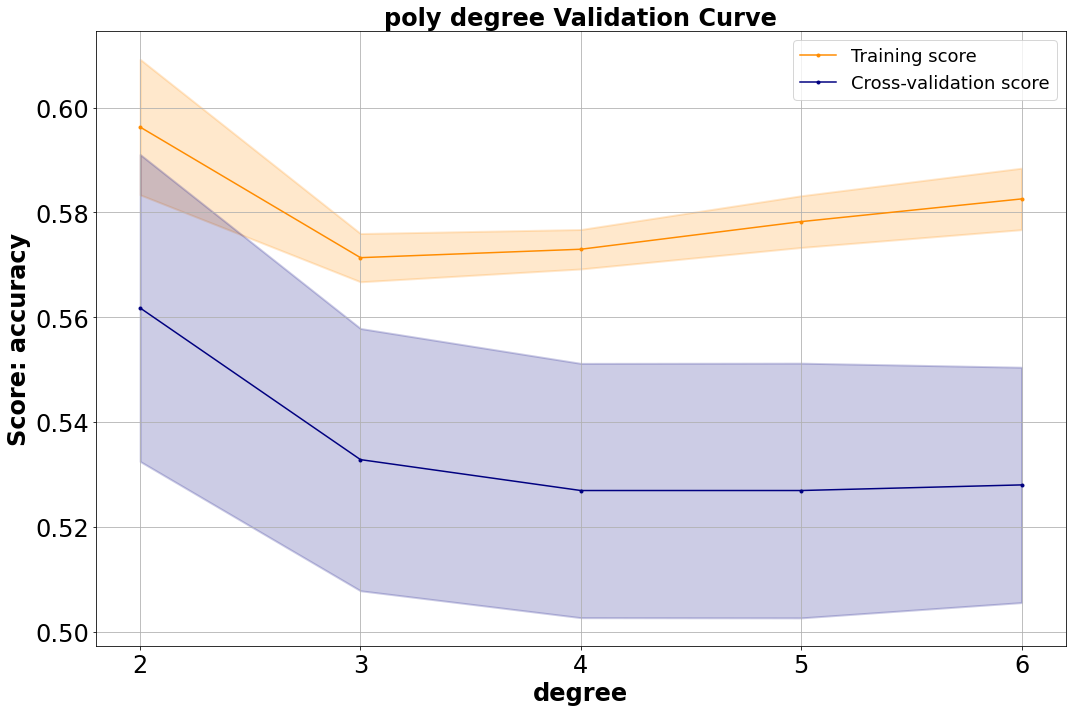

In [7]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(), X_train, y_train, "kernel", kernel, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "kernel", kernel, title="kernel Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(kernel='poly'), X_train, y_train, "degree", degree, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "degree", degree, title="poly degree Validation Curve", scoring="accuracy", tick_spacing=1)

In [8]:
C = [i for i in range(1, 50, 1)]
gamma = [i for i in range(1, 120, 1)]
kernel = ["linear", "rbf", "poly"]

parameters = {'kernel': kernel, 'C': C, 'gamma': gamma}

gs = common_SVM.perform_grid_search(parameters, X_train, y_train,scoring='accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


NOT performing Grid Search


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Plot saved as:  Figures/Noisy_Non-Linear_SVM_GS_ModelComplexity_C_gamma_kernel.png


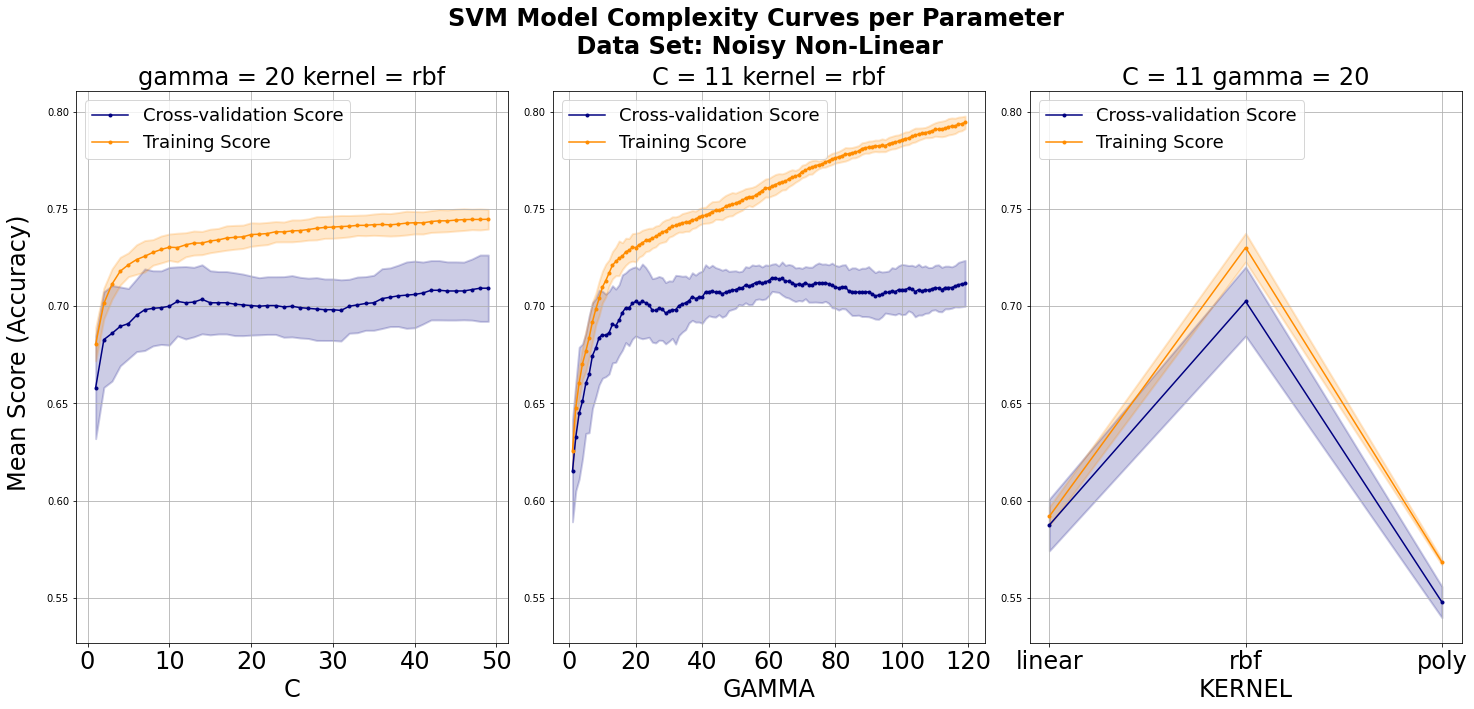

In [9]:
unused_params_values = {'kernel': 'rbf', 'gamma':20, 'C':11}
ylim=[0.5, 0.9]
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/Noisy_Non-Linear_SVM_GS_Times_C_gamma_kernel.png


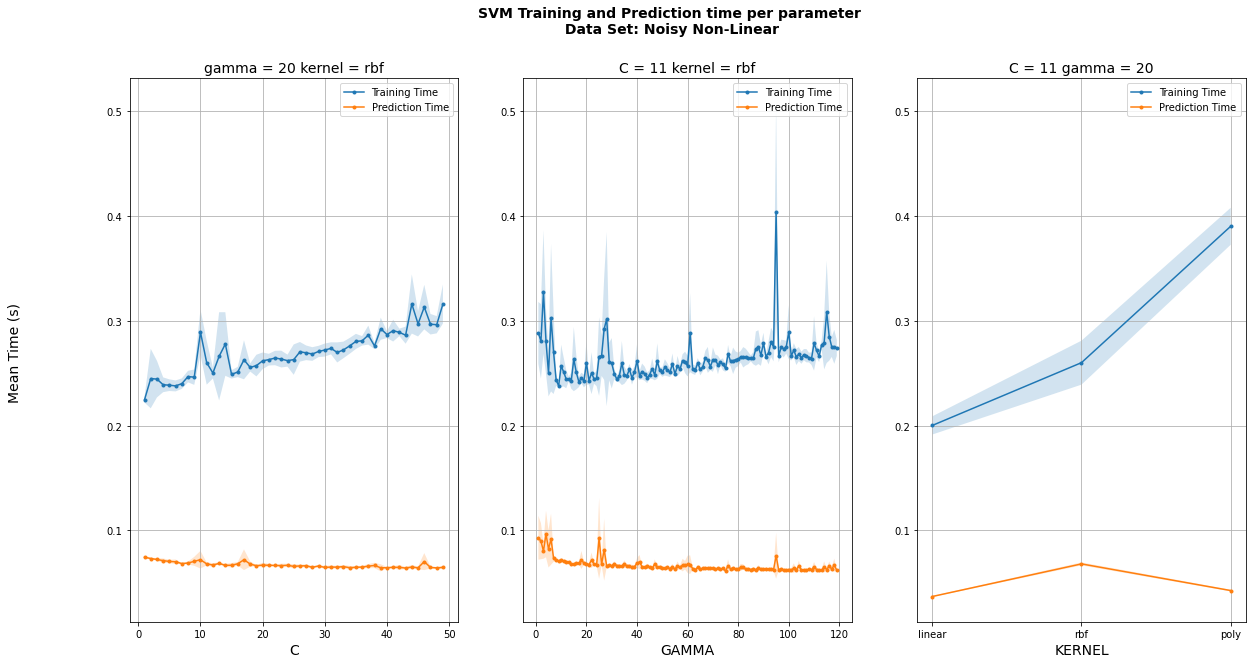

In [10]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/Noisy_Non-Linear_SVM_GS_ModelComplexity_C_gamma_kernel.png


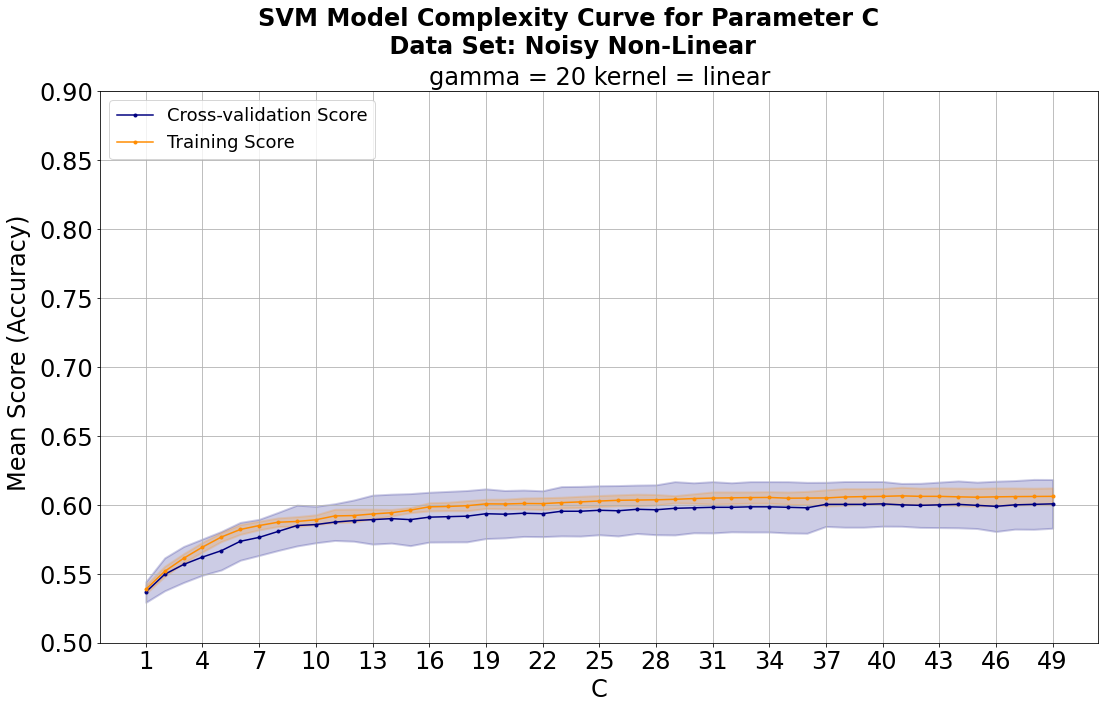

Plot saved as:  Figures/Noisy_Non-Linear_SVM_GS_ModelComplexity_C_gamma_kernel.png


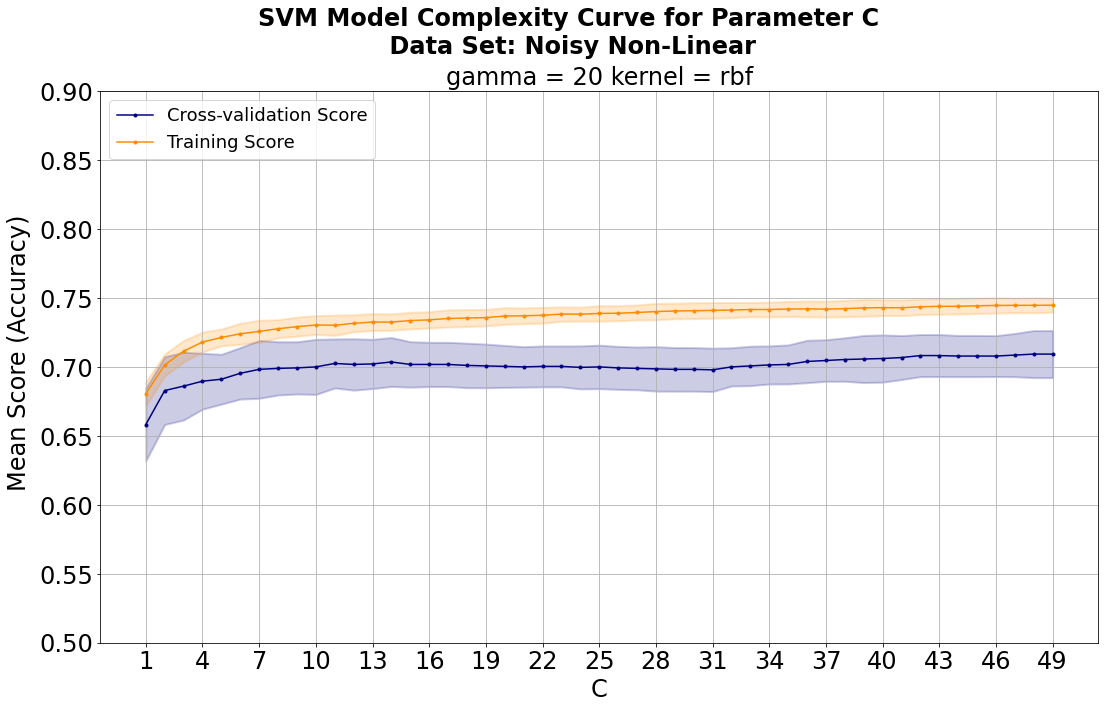

Plot saved as:  Figures/Noisy_Non-Linear_SVM_GS_ModelComplexity_C_gamma_kernel.png


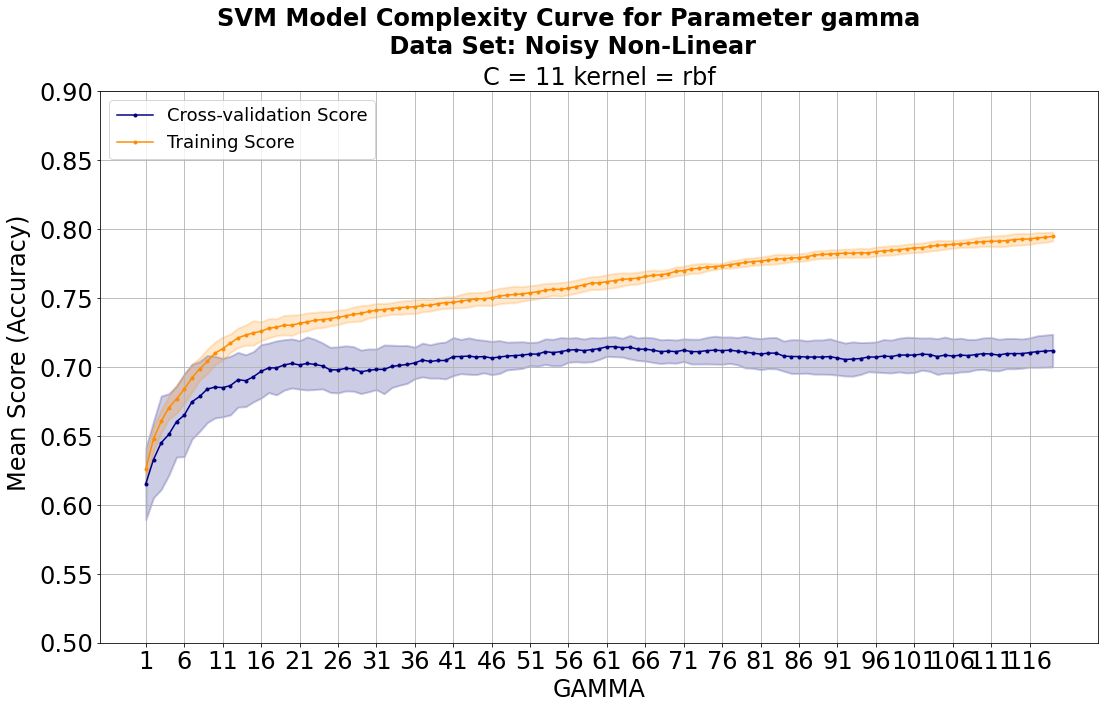

In [11]:
unused_params_values['kernel'] = 'linear'
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'C', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values, tick_spacing=3, ylim=ylim)
unused_params_values['kernel'] = 'rbf'
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'C', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values, tick_spacing=3, ylim=ylim)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'gamma', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values, tick_spacing=5, ylim=ylim)


Plot saved as:  Figures/Noisy_Non-Linear_SVM_GridScore_C_gamma_0.png


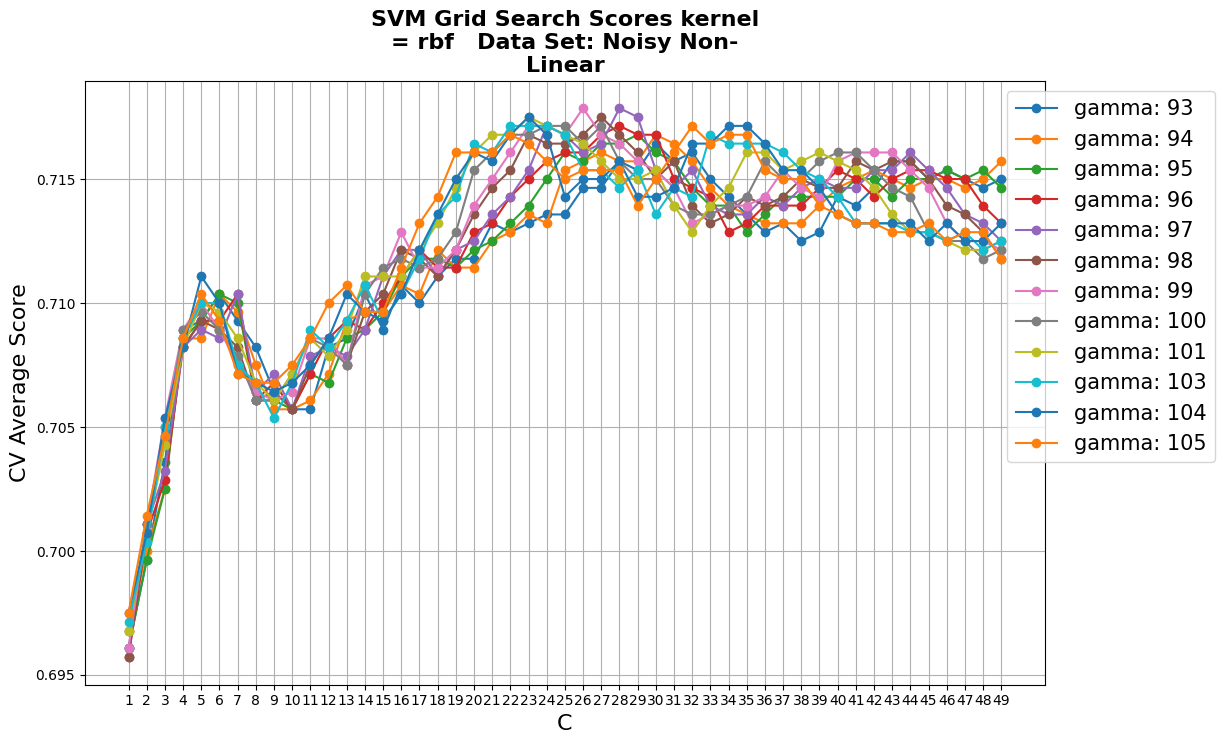

In [12]:
mean_score_limit = 0.713
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'C', 'gamma', mean_score_limit, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, plot_counter=GLOBAL_FIG_COUNTER, tick_spacing=1)
GLOBAL_FIG_COUNTER+=1

In [13]:
final_params = {'kernel': 'rbf', 'gamma':20, 'C':11}
train_sizes, train_scores, test_scores, fit_times, score_times = TrainingCurves.perform_learning_curve(svm.SVC(**final_params), X_train, y_train, "accuracy")

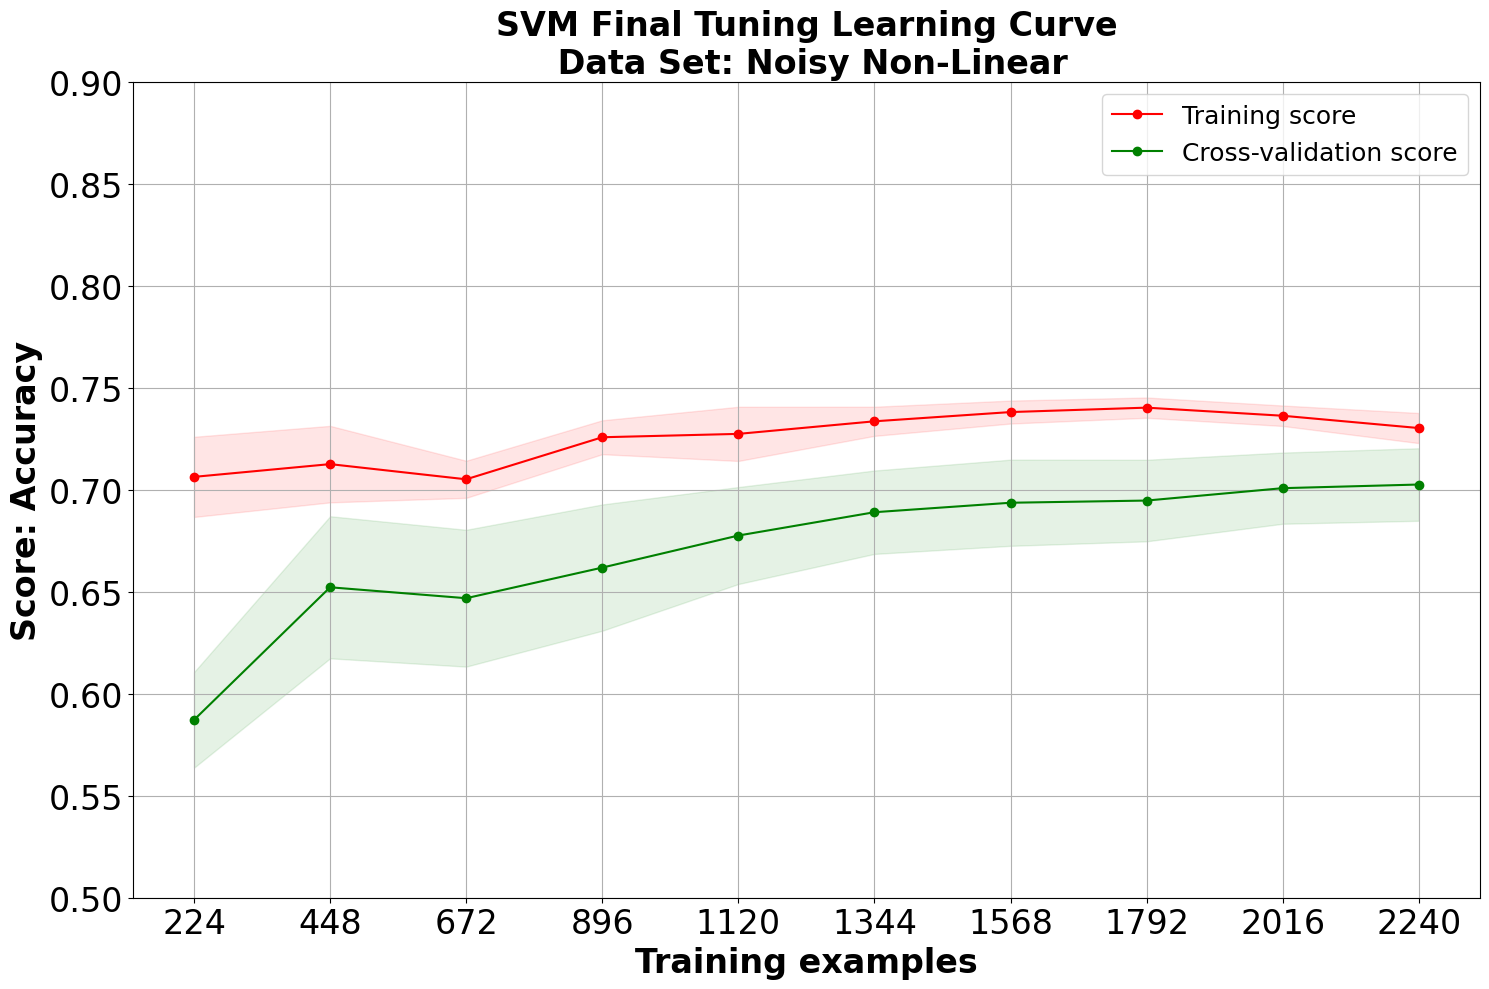

In [14]:
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, final_title, ylim=ylim)

In [15]:
unused_params_values = {'kernel': 'rbf', 'gamma':20, 'C':11}
clf = svm.SVC(**final_params)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7296428571428571
0.6414285714285715


In [16]:
clf.score(X_test, y_test_non_noisy)

0.7357142857142858

In [17]:
print("Final Fit Time: {}".format(np.mean(fit_times, axis=1)[-1]))
print("Final Predict Time: {}".format(np.mean(score_times, axis=1)[-1]))
poly_params = unused_params_values.copy()
poly_params['kernel']='poly'
_, _, _, poly_fit_times, poly_score_times = TrainingCurves.perform_learning_curve(svm.SVC(**poly_params), X_train, y_train, "accuracy")
print("Poly Fit Time: {} seconds".format(np.mean(poly_fit_times, axis=1)[-1]))
print("Poly Predict Time {} seconds".format(np.mean(poly_score_times, axis=1)[-1]))

Final Fit Time: 0.1280529022216797
Final Predict Time: 0.015320968627929688
Poly Fit Time: 0.21356592178344727 seconds
Poly Predict Time 0.01214299201965332 seconds
